### Testing of bloom filter hashing algorithms 

In [13]:
import pandas as pd
from bloom import bloom_hash, sum_digits, dice_coeff

In [14]:
df = pd.read_csv("../../simulated_data/dataset_1.csv", header = 0, delimiter = ",")
df.head()

,person_id,service_date,first_name,middle_name,last_name,dob,ssn
0,1000,2020-10-20,vicky,Kathy,Singh,1984-04-01,895-37-4654
1,1001,2021-09-06,Gary,Stacey,Watson,1984-10-22,220-72-9331
2,1002,2020-11-07,Anna,Joseph,Camacho,1996-04-11,404-44-6841
3,1003,2021-10-24,Rose,Amanda,Powers,1989-12-27,072-45-6710
4,1004,2020-12-26,Rebecca,Steven,Zuniga,1962-03-10,624-34-0417


#### ssn similarity - compare across all ssns

In [15]:
hashes_bits = [list(bloom_hash(20, 5, x)) for x in df.ssn.values]

hashes_list = []
for ha in hashes_bits:
    hashes_list.append([str(x) for x in ha])



In [16]:
hashes_list_comparison = []
for h in hashes_list:
    l = hashes_list
    l.remove(h)
    hashes_list_comparison.append((h, l))

In [11]:
# hashes_list_comparison[0]

In [21]:
# Comparing function
def compare(names):
    coeffs = []
    for row in names:
        bits1 = row[0]
        nicknames = row[1]
        for bits2 in nicknames:
            coeffs.append(dice_coeff(bits1, bits2))
    return coeffs

In [22]:
scores = compare(hashes_list_comparison)

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
hist1 = np.histogram(scores, bins = 10)

<BarContainer object of 10 artists>

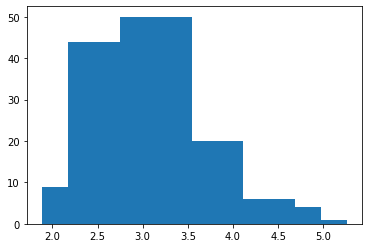

In [26]:
plt.bar(hist1[1][1:], hist1[0])

#### ssn similarity - same ssn, but with one typo in character